In [0]:
!pip install tensorflow==2.0.0-rc1 

In [139]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

import numpy as np
import re

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from google.colab import files

tf.__version__

'2.0.0-rc1'

# Sequence generation with TF2.0

In this notebook we train a simple model with lyrics by Rosalía ().
Next, we generate new song lyrics. 

The dataset used in this toy example is small (5 song only) and the model is simple. 

Feel free to used the model with a larger dataset and add some complexity! :)

In [140]:
# Upload the data
uploaded = files.upload()

Saving rosalia_lyrics.txt to rosalia_lyrics (1).txt


In [0]:
# Load the data
with open('rosalia_lyrics.txt', 'r') as infile:
    lyrics = infile.read()

In [142]:
# Sanity check
lyrics

"Esto vamo' a arrancarlo con altura\nEl dembow lo canto con hondura\nDicen una estrella, una figura\nDe Héctor aprendí la sabrosura\nNunca viste una joya tan pura\nEsto es pa' que quede, lo que yo hago dura\n(Con altura)\nDemasiadas noches de travesura\n(Con altura)\nVivo rápido y no tengo cura\n(Con altura)\nIré joven pa' la sepultura\n(Con altura)\nEsto es pa' que quede, lo que yo hago dura\n(Con altura)\nDemasiadas noches de travesura\n(Con altura)\nVivo rápido y no tengo cura\n(Con altura)\nIré joven pa' la sepultura\n(Con altura)\nPongo rosas sobre el Panamera\nPongo palmas sobre la guantanamera\nLlevo a Camarón en la guantera (De la Isla)\nLo hago para mi gente y lo hago a mi manera\nFlores azules y quilates\nY si es mentira que me maten\nFlores azules y quilates\nY si es mentira que me maten\n(Con altura)\n(Con altura)\nEsto es pa' que quede, lo que yo hago dura\n(Con altura)\nDemasiadas noches de travesura\n(Con altura)\nVivo rápido y no tengo cura\n(Con altura)\nIré joven pa' 

In [0]:
# Clean the data - remove verse, chorus, etc. tags
lyrics = re.sub('\[.+\]', '', lyrics)
lyrics = re.sub('\(.+\)', '', lyrics)

In [0]:
# Instantiate the tokenizer
tokenizer = Tokenizer()

In [0]:
# Get the corpus
corpus = lyrics.lower().split('\n')

In [0]:
# Remove empty lines
corpus = [line for line in corpus if len(line) != 0]

In [0]:
# Fit the tokenizer
tokenizer.fit_on_texts(corpus)

In [0]:
# Adding one to consider out-of-vocab words
n_words = len(tokenizer.word_index) + 1

In [0]:
# turn the corpus into the training data
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range (1, len(token_list)):
        n_gram_seq = token_list[:i + 1]
        input_sequences.append(n_gram_seq)

In [0]:
# Find the length of the longest seq in the corpus
max_seq_len = max([len(x) for x in input_sequences])

In [151]:
max_seq_len

15

In [0]:
# Pad sequences
in_seqs = pad_sequences(input_sequences, 
                        maxlen  = max_seq_len,
                        padding = 'pre')

In [153]:
# A quick sanity check
for i, seq in enumerate(in_seqs):
    if i < 10:
        print(seq)

[  0   0   0   0   0   0   0   0   0   0   0   0   0  32 107]
[  0   0   0   0   0   0   0   0   0   0   0   0  32 107  20]
[  0   0   0   0   0   0   0   0   0   0   0  32 107  20 108]
[  0   0   0   0   0   0   0   0   0   0  32 107  20 108  62]
[  0   0   0   0   0   0   0   0   0  32 107  20 108  62  81]
[  0   0   0   0   0   0   0   0   0   0   0   0   0  11 109]
[  0   0   0   0   0   0   0   0   0   0   0   0  11 109  17]
[  0   0   0   0   0   0   0   0   0   0   0  11 109  17 110]
[  0   0   0   0   0   0   0   0   0   0  11 109  17 110  62]
[  0   0   0   0   0   0   0   0   0  11 109  17 110  62 111]


In [0]:
# Data-label split
X = in_seqs[:, :-1]
y = in_seqs[:, -1]

In [0]:
# One-hot encode the labels
y = tf.keras.utils.to_categorical(y, num_classes = n_words)

In [0]:
# Build a generative model
model = Sequential()

model.add(Embedding(n_words, 64, 
                    input_length = max_seq_len - 1))       # We subtract 1 as we removed the last token - it now our label

model.add(Bidirectional(LSTM(50)))

model.add(Dense(n_words, activation = 'softmax'))

model.compile(loss      = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics   = ['accuracy'])

In [180]:
hist = model.fit(X, y, epochs = 350, verbose = 1)

Train on 893 samples
Epoch 1/350
893/893 [==============================] - 5s 6ms/sample - loss: 5.4287 - accuracy: 0.0538
Epoch 2/350
893/893 [==============================] - 0s 557us/sample - loss: 4.7773 - accuracy: 0.0705
Epoch 3/350
893/893 [==============================] - 1s 572us/sample - loss: 4.6241 - accuracy: 0.0594
Epoch 4/350
893/893 [==============================] - 0s 522us/sample - loss: 4.4682 - accuracy: 0.0784
Epoch 5/350
893/893 [==============================] - 1s 570us/sample - loss: 4.2324 - accuracy: 0.1232
Epoch 6/350
893/893 [==============================] - 0s 551us/sample - loss: 4.0380 - accuracy: 0.1545
Epoch 7/350
893/893 [==============================] - 1s 567us/sample - loss: 3.8808 - accuracy: 0.1792
Epoch 8/350
893/893 [==============================] - 0s 557us/sample - loss: 3.7220 - accuracy: 0.1881
Epoch 9/350
893/893 [==============================] - 0s 554us/sample - loss: 3.5602 - accuracy: 0.2116
Epoch 10/350
893/893 [==============

In [0]:
def plot_metrics(history):
    plt.plot(history.history['loss'], label = 'Loss')
    plt.plot(history.history['accuracy'], label = 'Acc')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

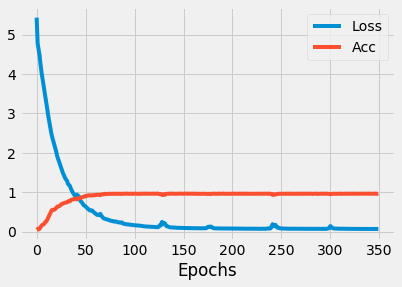

In [182]:
plot_metrics(hist)

In [0]:
# Set params
seeds = ["Voy a", 'Tu', 'Demasiado', 'Te quiero', 'Nunca', 'No quiero mas']     # Some random Spanish phrases :)
next_words = 20

In [184]:
# Generate a new seq
for seed in seeds:
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed])[0]
        token_list = pad_sequences([token_list], 
                                maxlen  = max_seq_len - 1,
                                padding = 'pre')
        predicted = model.predict_classes(token_list,
                                        verbose = 0)
        output_word = ""

        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed += " " + output_word
    print(seed)

Voy a salir pa' la calle en la manita los aros brillando en mi piel piel piel piel piel piel piel piel
Tu jeva ya la vi por dentro la luna que brillando en mi piel piel piel piel piel piel piel piel
Demasiado lo que yo hago dura dura dura hago manera cuello piel piel piel piel piel piel mi te salen sed
Te quiero cruzarlo bonita que amenaza cuando rompía rompía amarrarse a tu culpa piel piel piel piel piel piel piel piel piel
Nunca viste una joya tan pura pura pura vez guantera piel piel piel piel piel piel piel piel piel piel piel
No quiero mas haya nadie cerca cerca siento la siento que tú quieras mirarlos mirarlos esquina yali y mi culpa culpa piel piel
